Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font> 

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [2]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks. 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work. 
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [3]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data', 
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


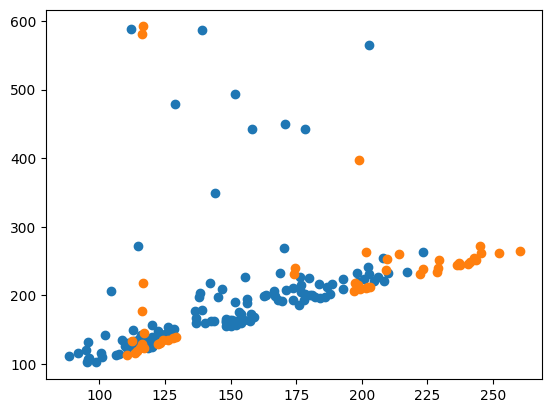

In [4]:
'''
Function scat_plt (var1, var2, groups)
Given the variables var1 and var2, creates a scatterplot of the two variables, displaying
the information given on groups using different colors(or symbols). That is, observations
belonging to a given group 1 will be displayed on a given color, observations belonging
to group 2 will be displayed with a different color and so on. var1 is displayed in the xaxis and var2 in the y-axis. The obtained plot should contain a legend displaying the
information regarding to groups
Inputs:
var1 and var2: Two given variables of the same length
groups: A variable the same size as var1 and var2 where the information regarding to
group belonging is contained.

'''
def scat_plt(var1, var2, groups):
    df = pd.DataFrame({
        'var1': var1,
        'var2': var2,
        'groups': groups
    })
    unique_groups = df['groups'].unique()
    for group in unique_groups:
        plt.scatter(df[df['groups'] == group]['var1'], df[df['groups'] == group]['var2'], label=group)
    plt.show()


data = pd.read_csv('parkinsons.data')

scat_plt(data['MDVP:Fo(Hz)'], data['MDVP:Fhi(Hz)'], data['status'])


In [5]:
'''
Based on the variable ‘name’ write some code in the main that creates two new columns
in the dataframe: one displaying the subject id (S1, S2, S3…) and another displaying the
trial (t1, t2, t3, …, t6 or t7 in some cases). Remover the column name from the
dataframe.

'''

data[['subject_id', 'trial']] = data['name'].str.split('_', n=1, expand=True)

data['trial'] = data['trial'].str.split('_', n=1, expand=True)[1]

data = data.drop(columns=['name'])


In [6]:
'''
Function normalize (df, op)
Given a dataframe df, normalizes all variables according to the optionsin op. op can only
take two values, 0 for normalizing the variables based on the z-score and 1 for
normalizing the variables based on the min_max approach. The function returns a
dataframe consisting on normalized variables.
Be aware of avoiding normalizing variables that are supposed to be categorical, even if
the type of such variables is not specifically categorical (that is, a variable can be of type
numerical even when it represents categories)
Inputs:
df: A given dataframe
op: numeric variable (either 0 or 1)
Output
norm_df: normalized dataframe

'''

def normalize(df, op):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    if op == 0:
        scaler = StandardScaler()
    elif op == 1:
        scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df